In [2]:
import pandas as clickbait_panns
import matplotlib.pyplot as clickbait_mat
import numpy as clickbait_nmp
import warnings as clickbait_wngs
clickbait_wngs.filterwarnings('ignore')

load_clickbait = 'clickbait_detection_file.csv'
click_bait_detection = clickbait_panns.read_csv(load_clickbait)
print("\nShape of Clickbait Data:", click_bait_detection.shape)
click_bait_detection.head()


Shape of Clickbait Data: (32000, 3)


,headline,clickbait,Processed_Headline
0,Should I Get Bings,1,get bing
1,Which TV Female Friend Group Do You Belong In,1,tv femal friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,new star war forc awaken trailer give chill
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,vine new york celebr big brother fuck perfect
4,A Couple Did A Stunning Photo Shoot With Their...,1,coupl stun photo shoot babi learn inoper brain...


### Doc2Vec Technique

In [3]:
!pip uninstall numpy gensim -y
!pip install --no-cache-dir numpy gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 144.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 168.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 151.9 MB/s eta 0:00:00


In [4]:
import numpy as np
print(np.__version__)

1.26.4


In [5]:
!pip install numpy==1.26.4

In [6]:
!pip show gensim

Name: gensim
Version: 4.3.3
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, scipy, smart-open
Required-by: 


In [7]:
!pip install gensim

In [8]:
import numpy as clickbait_nmp
from gensim.models.doc2vec import Doc2Vec as clickbait_docvec, TaggedDocument as clickbait_tagdoc

click_bait_Xi = click_bait_detection['Processed_Headline']
click_bait_Yo = click_bait_detection['clickbait']
print("Output Class Labels of Clickbait:\n", click_bait_Yo.value_counts())

### Gensim's Doc2Vec
clickbait_tagged_data = [clickbait_tagdoc(words=text.split(), tags=[i]) for i, text in enumerate(click_bait_Xi)]
clickbait_doc2vecMod = clickbait_docvec(vector_size=300, window=5, min_count=2, workers=4, epochs=10)
clickbait_doc2vecMod.build_vocab(clickbait_tagged_data)
clickbait_doc2vecMod.train(clickbait_tagged_data, total_examples=clickbait_doc2vecMod.corpus_count, epochs=clickbait_doc2vecMod.epochs)

### Transforming text to vectors
click_bait_Xi_vec = clickbait_nmp.array([clickbait_doc2vecMod.infer_vector(text.split()) for text in click_bait_Xi])
print("\nClickbait Data vectorized using Doc2Vec:", click_bait_Xi_vec.shape)


Output Class Labels of Clickbait:
 clickbait
0    16001
1    15999
Name: count, dtype: int64

Clickbait Data vectorized using Doc2Vec: (32000, 300)


In [9]:
click_bait_Xi_vec

array([[ 0.0031295 , -0.00125156, -0.00123015, ..., -0.0074035 ,
         0.00809951, -0.00351734],
       [ 0.0060686 , -0.01546778, -0.00680328, ..., -0.01168747,
         0.01049513, -0.03154546],
       [ 0.01346821,  0.00980719, -0.00230299, ..., -0.00226215,
         0.03526204, -0.02151042],
       ...,
       [-0.00458779,  0.02397657,  0.0025851 , ...,  0.00740031,
        -0.00366091,  0.01112739],
       [-0.01605477,  0.04156933,  0.00745249, ..., -0.00534528,
         0.00839782,  0.00028617],
       [-0.01594999,  0.02593917,  0.00630353, ...,  0.0058095 ,
        -0.00703828,  0.00487305]], dtype=float32)

In [10]:
from sklearn.model_selection import GridSearchCV as click_bait_gscv
from sklearn.metrics import ConfusionMatrixDisplay as click_bait_cfmdsp
from sklearn.metrics import classification_report as click_bait_clasficrp
from sklearn.metrics import confusion_matrix as click_bait_cfmtx
from sklearn import metrics as click_bait_met
from sklearn.model_selection import train_test_split as click_bait_tvts


click_bait_Xitr, click_bait_Xits, click_bait_Yotr, click_bait_Yots = click_bait_tvts(click_bait_Xi_vec, click_bait_Yo, random_state=52, test_size=0.4)
click_bait_Xivn, click_bait_Xits, click_bait_Yovn, click_bait_Yots = click_bait_tvts(click_bait_Xits, click_bait_Yots, random_state=52, test_size=0.5)
print("Samples of Training  : ",click_bait_Xitr.shape, click_bait_Yotr.shape)
print("Samples of Validation: ",click_bait_Xivn.shape, click_bait_Yovn.shape)
print("Samples of Testing   : ",click_bait_Xits.shape, click_bait_Yots.shape)

Samples of Training  :  (19200, 300) (19200,)
Samples of Validation:  (6400, 300) (6400,)
Samples of Testing   :  (6400, 300) (6400,)


### SVM

In [11]:
from sklearn.svm import SVC as click_bait_support_vm

click_bait_parameter = {'degree': [5, 9, 10],
                      'gamma':['scale','auto'],
                      'kernel': ['linear','poly','rbf'],
                       }

click_bait_MDL = click_bait_support_vm(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("SVM Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

SVM Best Parameters --- Clickbait Detection:
{'degree': 5, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(degree=5, random_state=52)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3192
           1       0.91      0.90      0.91      3208

    accuracy                           0.91      6400
   macro avg       0.91      0.91      0.91      6400
weighted avg       0.91      0.91      0.91      6400



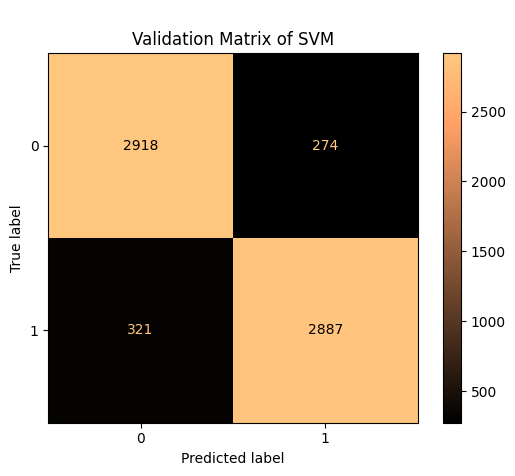

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3230
           1       0.92      0.90      0.91      3170

    accuracy                           0.91      6400
   macro avg       0.91      0.91      0.91      6400
weighted avg       0.91      0.91      0.91      6400



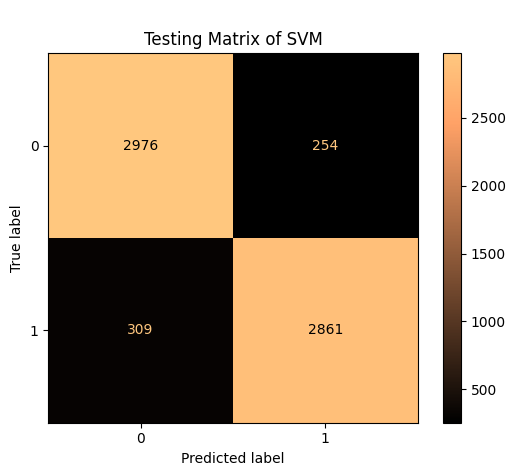

In [12]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of SVM')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of SVM')
clickbait_mat.show()

### LR

In [13]:
from sklearn.linear_model import LogisticRegression as click_bait_logistic

click_bait_parameter = {'C': [0.1, 0.2, 0.3],
                        'penalty':['l2','elasticnet','l1'],
                        'solver': ['sag','saga', 'liblinear','newton-cg', 'newton-cholesky']
                       }

click_bait_MDL = click_bait_logistic(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("LR Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

LR Best Parameters --- Clickbait Detection:
{'C': 0.3, 'penalty': 'l2', 'solver': 'sag'}


LogisticRegression(C=0.3, random_state=52, solver='sag')

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3192
           1       0.88      0.87      0.87      3208

    accuracy                           0.87      6400
   macro avg       0.87      0.87      0.87      6400
weighted avg       0.87      0.87      0.87      6400



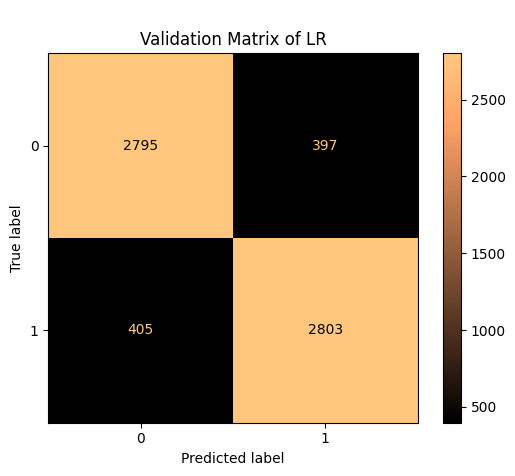

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3230
           1       0.88      0.87      0.88      3170

    accuracy                           0.88      6400
   macro avg       0.88      0.88      0.88      6400
weighted avg       0.88      0.88      0.88      6400



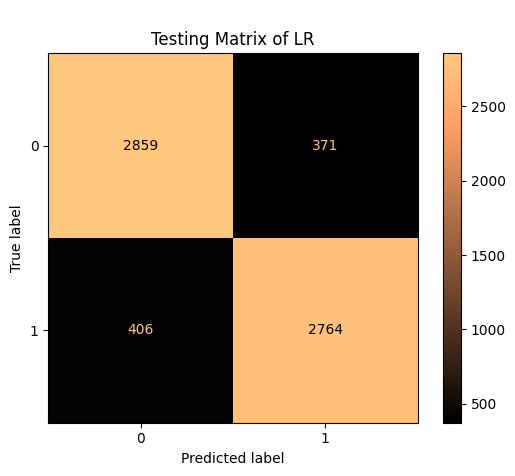

In [14]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of LR')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of LR')
clickbait_mat.show()

### RF

In [15]:
from sklearn.ensemble import RandomForestClassifier as click_bait_forest

click_bait_parameter = {'max_depth': [5, 9, 10],
                      'n_estimators':[300, 100, 50],
                      'criterion': ['gini','log_loss','entropy'],
                       }

click_bait_MDL = click_bait_forest(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("RF Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

RF Best Parameters --- Clickbait Detection:
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 300}


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=52)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3192
           1       0.90      0.90      0.90      3208

    accuracy                           0.90      6400
   macro avg       0.90      0.90      0.90      6400
weighted avg       0.90      0.90      0.90      6400



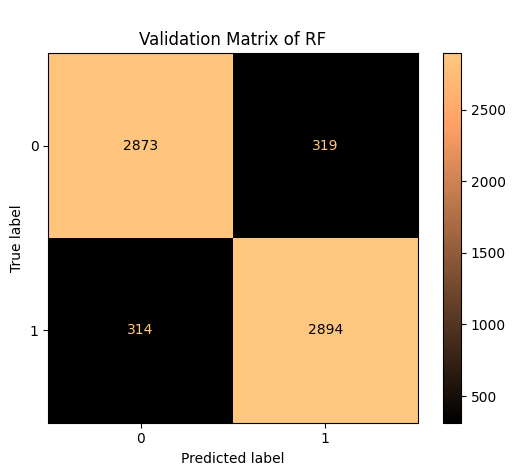

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3230
           1       0.90      0.90      0.90      3170

    accuracy                           0.90      6400
   macro avg       0.90      0.90      0.90      6400
weighted avg       0.90      0.90      0.90      6400



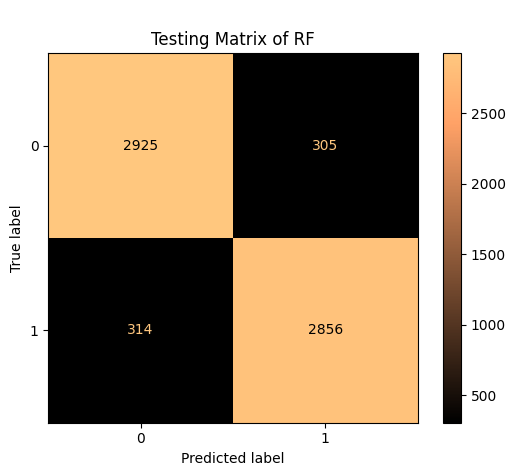

In [16]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of RF')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of RF')
clickbait_mat.show()

### XGB

In [17]:
from xgboost import XGBClassifier as click_bait_xtreme

click_bait_parameter = {'booster': ['gbtree','gblinear','dart'],
                      'max_depth':[5, 9, 10],
                      'min_child_weight': [1, 4, 8]
                       }

click_bait_MDL = click_bait_xtreme(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("XGB Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

XGB Best Parameters --- Clickbait Detection:
{'booster': 'gbtree', 'max_depth': 5, 'min_child_weight': 4}


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=52, ...)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3192
           1       0.91      0.90      0.91      3208

    accuracy                           0.91      6400
   macro avg       0.91      0.91      0.91      6400
weighted avg       0.91      0.91      0.91      6400



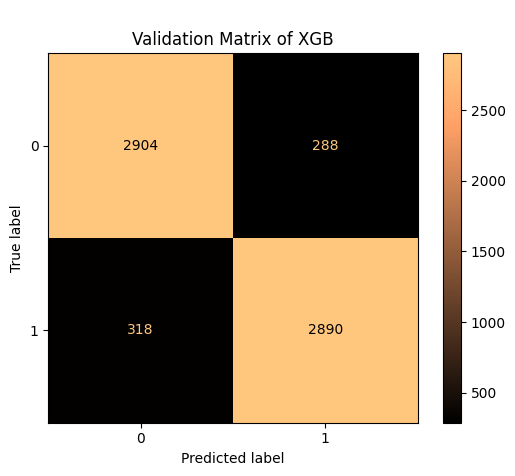

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3230
           1       0.90      0.90      0.90      3170

    accuracy                           0.91      6400
   macro avg       0.90      0.90      0.90      6400
weighted avg       0.91      0.91      0.91      6400



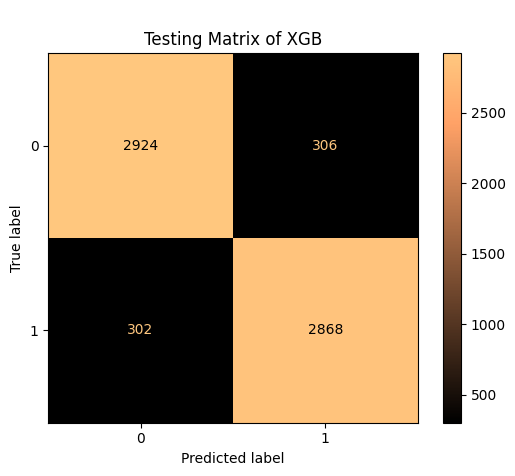

In [18]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of XGB')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of XGB')
clickbait_mat.show()

### GB

In [19]:
from sklearn.ensemble import GradientBoostingClassifier as click_bait_gradient

click_bait_parameter = {'n_estimators': [300, 100, 50],
                      'learning_rate':[0.1, 0.4, 0.9],
                      'max_depth': [5, 9, 10],
                       }

click_bait_MDL = click_bait_gradient(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("GB Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

GB Best Parameters --- Clickbait Detection:
{'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 300}


GradientBoostingClassifier(learning_rate=0.4, max_depth=5, n_estimators=300,
                           random_state=52)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3192
           1       0.90      0.90      0.90      3208

    accuracy                           0.90      6400
   macro avg       0.90      0.90      0.90      6400
weighted avg       0.90      0.90      0.90      6400



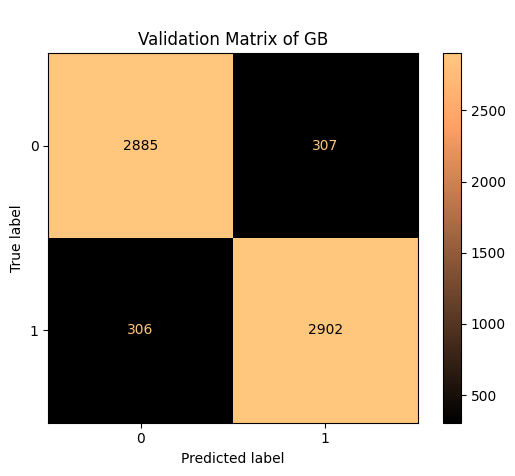

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3230
           1       0.90      0.90      0.90      3170

    accuracy                           0.90      6400
   macro avg       0.90      0.90      0.90      6400
weighted avg       0.90      0.90      0.90      6400



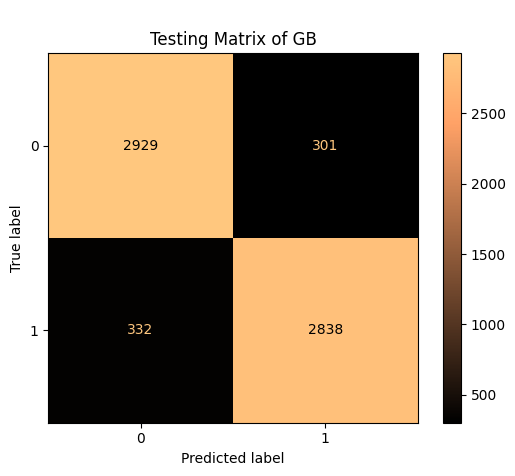

In [20]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of GB')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of GB')
clickbait_mat.show()